In [1]:
import pandas as pd
import glob,os
import numpy as np
import pandas as pd 
import numpy.matlib
import math
import optuna
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
#import tensorflow as tf
%matplotlib inline

In [2]:
def get_all_time_series():
    path = r'./COVID-19/csse_covid_19_data/csse_covid_19_time_series'
    all_files = glob.glob(os.path.join(path, "*.csv"))
    for i in [0,3,4]:
        file = all_files[i]
        df = pd.read_csv(file)
        #confirmed_all = dict()
        if i==0:
            df_confirmed = pd.DataFrame()
            for row in df.values:
                df_confirmed[row[1]] = row[4:]
        if i==3:
            df_recovered = pd.DataFrame()
            for row in df.values:
                df_recovered[row[1]] = row[4:]
        if i==4:
            df_deaths = pd.DataFrame()
            for row in df.values:
                df_deaths[row[1]] = row[4:]
    df_infected = df_confirmed - df_deaths - df_recovered
    return [df_infected,df_confirmed,df_recovered,df_deaths]

In [3]:
[df_infected,df_confirmed,df_recovered,df_deaths] = get_all_time_series()

In [4]:
for index in df_infected.keys():
    print(index)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Mal

In [5]:
len(df_infected.keys())

188

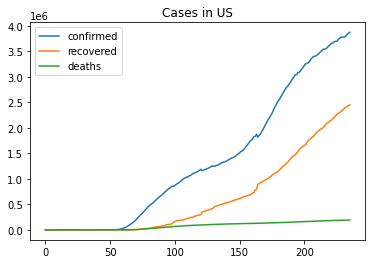

In [6]:
plt.plot(np.arange(len(df_confirmed['US'].values)),df_infected['US'].values,label='confirmed')
plt.plot(np.arange(len(df_recovered['US'].values)),df_recovered['US'].values,label='recovered')
plt.plot(np.arange(len(df_deaths['US'].values)),df_deaths['US'].values,label='deaths')
plt.legend()
plt.title('Cases in US')
plt.savefig("cases_in_US")

In [7]:
df_infected['US'].values

array([1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 8, 8,
       9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 9,
       16, 22, 39, 58, 85, 153, 194, 313, 422, 486, 677, 1064, 1475, 2052,
       2744, 2904, 4240, 5821, 8090, 12288, 18225, 23869, 32401, 42910,
       52763, 64369, 81197, 98979, 118101, 135068, 152899, 176471, 199310,
       227685, 257524, 284208, 307696, 333435, 359459, 387211, 417888,
       445791, 471218, 496240, 509091, 529420, 551574, 578089, 604878,
       624893, 643743, 666952, 686893, 710629, 739313, 754574, 784504,
       804248, 820811, 838593, 858808, 852888, 875091, 891227, 910924,
       925038, 944294, 967067, 987889, 1009363, 1020067, 1035303, 1036603,
       1059612, 1065663, 1088513, 1107799, 1114055, 1128412, 1138096,
       1150779, 1168140, 1188172, 1159352, 1168962, 1183656, 1189678,
       1202154, 1212312, 1225466, 1242355, 1255827, 1246859, 1249965,
       1264155, 1267716, 1282300, 1299906, 1312836, 1324611, 1

In [8]:
us_population = 327200000

In [9]:
end_time = len(df_infected['US'])

num_times = len(df_infected['US'].values[0:end_time])
print(num_times)

236


In [10]:
def to_float(x):
    return float(x)

to_float_vec = np.vectorize(to_float)

In [11]:
Ic = df_infected['US'].values[0:end_time]
Dc = df_deaths['US'].values[0:end_time]

Ic = to_float_vec(Ic)
Dc = to_float_vec(Dc)

In [12]:
#beta = 0.6345301162187955
#gamma = 0.43979856466213035
#mu = 0.006641658374541129


beta=0.26
gamma=0.08
mu=0.0033


beta_0 = np.array([beta for i in range(num_times)])
gamma_0 = np.array([gamma for i in range(num_times)])
mu_0 = np.array([mu for i in range(num_times)])


print("beta={}\ngamma={}\nmu={}".format(beta,gamma,mu))

beta=0.26
gamma=0.08
mu=0.0033


In [13]:
x= np.arange(len(beta_0))
y = np.log(x+1)

In [14]:
d  = 10
h =  1/d
n = len(beta_0)

y_interp = []
y_interp.append(y[0])

for i in range(n-1):
    for t in range(d):
        t = t+1
        y_interp.append(y[i] + t*h*(y[i+1]-y[i]))
y_interp = np.array(y_interp)

In [15]:
t_span = list(np.arange(0,n-1,0.1))
t_span.append(t_span[-1]+0.1)
t_span=np.array(t_span)

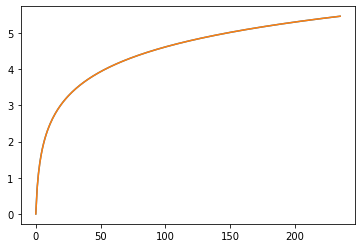

In [16]:
plt.plot(x,y)
plt.plot(t_span,y_interp)

In [17]:
len(beta_0)

236

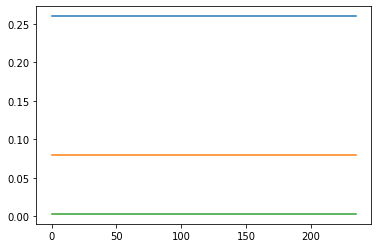

In [18]:
plt.plot(np.arange(len(beta_0)), beta_0)
plt.plot(np.arange(len(gamma_0)), gamma_0)
plt.plot(np.arange(len(mu_0)), mu_0)

In [19]:
def interpolate(y,d):
    #d  = 10
    h =  1/d
    n = len(y)

    y_interp = []
    y_interp.append(y[0])

    for i in range(n-1):
        for t in range(d):
            t = t+1
            y_interp.append(y[i] + t*h*(y[i+1]-y[i]))
    y_interp = np.array(y_interp)
    return y_interp

In [85]:
def solve_sird_euler(beta,gamma,mu,d):
    S_t = []
    I_t = []
    R_t = []
    D_t = []

    S_t.append(us_population-1.)
    I_t.append(1.)
    R_t.append(0.)
    D_t.append(0.)
    
    h = 1/d
    
    beta_t = interpolate(beta,d)
    gamma_t = interpolate(gamma,d)
    mu_t = interpolate(mu,d)
    
    for t in range((num_times-1)*d):
        Snew = S_t[t] - h*(beta_t[t]/us_population * S_t[t]*I_t[t])
        Inew = I_t[t] + h*(beta_t[t]/us_population * S_t[t]*I_t[t] - gamma_t[t]*I_t[t] - mu_t[t]*I_t[t])
        Rnew = R_t[t] + h*(gamma_t[t]* I_t[t])
        Dnew = D_t[t] + h*(mu_t[t]*I_t[t])
        S_t.append(Snew)
        I_t.append(Inew)
        R_t.append(Rnew)
        D_t.append(Dnew)
    
    S = []
    I = []
    R = []
    D = []
    
    for i in range(num_times):
        S.append(S_t[10*i])
        I.append(I_t[10*i])
        R.append(R_t[10*i])
        D.append(D_t[10*i])
    
    return [S,I,R,D]

    S = []
    I = []
    R = []
    D = []

    S.append(us_population-1.)
    I.append(1.)
    R.append(0.)
    D.append(0.)

    for i in range(num_times-1):
        Snew = S[i] - beta_0[i]/us_population * S[i]*I[i]
        Inew = I[i] + beta_0[i]/us_population * S[i]*I[i] - gamma_0[i]*I[i] - mu_0[i]*I[i]
        Rnew = R[i] + gamma_0[i]* I[i]
        Dnew = D[i] + mu_0[i]*I[i]
        S.append(Snew)
        I.append(Inew)
        R.append(Rnew)
        D.append(Dnew)
        
    I = np.array(I)
    D = np.array(D)
    R = np.array(R)
    S = np.array(S)


In [86]:
[S,I,R,D] = solve_sird_euler(beta_0,gamma_0,mu_0,10)

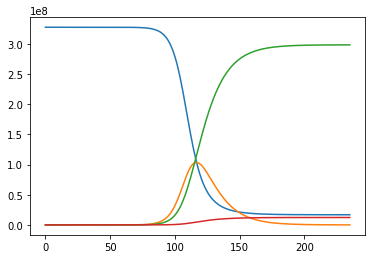

In [87]:
plt.plot(np.arange(len(I)),S, label = 'S')
plt.plot(np.arange(len(I)),I, label = 'I')
plt.plot(np.arange(len(I)),R, label = 'R')
plt.plot(np.arange(len(I)),D, label = 'D')

In [88]:
def solve_sird_new(num_times,beta_t,gamma_t,mu_t,s0,i0,r0,d0):
    t = np.linspace(0,num_times-1,num_times)
    #times = np.arange(len(beta_t))
    #Us = np.empty((len(beta_t),4))
    q0 = [s0,i0,r0,d0]
    interp = interp1d(t,(beta_t,gamma_t,mu_t))
    
    def system(t, U):
        #print(U)
        s,i,r,d = U[0],U[1],U[2],U[3]
        #print(t)
        beta, gamma, mu = interp(t)
        return np.array([-beta*s*i, beta*s*i-(gamma+mu)*i, gamma*i, mu*i])
    
    steps = 1
    atol = 1e-11
    method = 'RK45'
    solution = solve_ivp(system, (0, num_times-1), q0, method=method, t_eval=t, atol=atol, vectorized=True,max_step=1,first_step=0.05)
    return solution

In [89]:
i0 = 1/us_population
r0 = 0
s0 = 1-i0
R1 = 3./100.
d0 = 0

In [90]:
len(beta_0)

236

In [91]:
solution = solve_sird_new(len(beta_0),beta_0,gamma_0,mu_0,s0,i0,r0,d0)

In [92]:
s = solution.y[0,:]
i = solution.y[1,:]
r = solution.y[2,:]
d = solution.y[3,:]

S2 = s*us_population
I2 = i*us_population
R2 = r*us_population
D2 = d*us_population

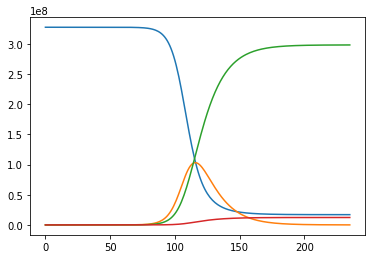

In [93]:
plt.plot(np.arange(len(I)),S2, label = 'S2')
plt.plot(np.arange(len(I)),I2, label = 'I2')
plt.plot(np.arange(len(I)),R2, label = 'R2')
plt.plot(np.arange(len(I)),D2, label = 'D2')

10547292.201348722


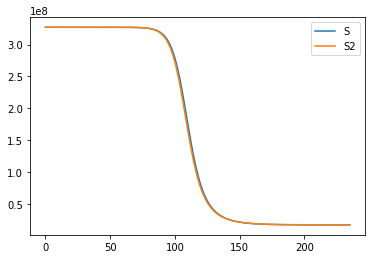

In [105]:
plt.plot(np.arange(len(I)),S, label = 'S')
plt.plot(np.arange(len(I)),S2, label = 'S2')
print(np.max(np.abs(S-S2)))
plt.legend()

5172728.590474516


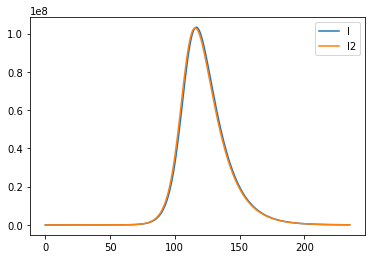

In [102]:
plt.plot(np.arange(len(I)),I, label = 'I')
plt.plot(np.arange(len(I)),I2, label = 'I2')
print(np.max(np.abs(I-I2)))
plt.legend()

7247696.25301896


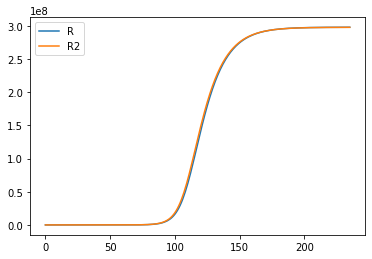

In [101]:
plt.plot(np.arange(len(I)),R, label = 'R')
plt.plot(np.arange(len(I)),R2, label = 'R2')
print(np.max(np.abs(R-R2)))
plt.legend()

298967.4704370331


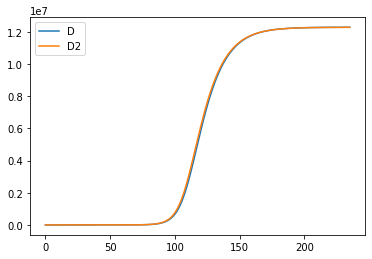

In [104]:
plt.plot(np.arange(len(I)),D, label = 'D')
plt.plot(np.arange(len(I)),D2, label = 'D2')
print(np.max(np.abs(D-D2)))
plt.legend()